## Нейронные сети: зависимость ошибки и обучающей способности от числа нейронов

В этом задании вы будете настраивать двуслойную нейронную сеть для решения задачи многоклассовой классификации. Предлагается выполнить процедуры загрузки и разбиения входных данных, обучения сети и подсчета ошибки классификации. Предлагается определить оптимальное количество нейронов в скрытом слое сети. Нужно так подобрать число нейронов, чтобы модель была с одной стороны несложной, а с другой стороны давала бы достаточно точный прогноз и не переобучалась. Цель задания -- показать, как зависит точность и обучающая способность сети от ее сложности.

Для решения задачи многоклассовой классификации предлагается воспользоваться библиотекой построения нейронных сетей [pybrain](http://pybrain.org/). Библиотека содержит основные модули инициализации двуслойной нейронной сети прямого распространения, оценки ее параметров с помощью метода обратного распространения ошибки (backpropagation) и подсчета ошибки.

Установить библиотеку pybrain можно с помощью стандартной системы управления пакетами pip:

```
pip install pybrain
```
Кроме того, для установки библиотеки можно использовать и другие способы, приведенные в [документации](https://github.com/pybrain/pybrain/wiki/installation). 

###  Используемые данные

Рассматривается задача оценки качества вина по его физико-химическим свойствам [1]. Данные размещены в [открытом доступе](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) в репозитории UCI  и содержат 1599 образцов красного вина, описанных 11 признаками, среди которых -- кислотность, процентное содержание сахара, алкоголя и пр. Кроме того, каждому объекту поставлена в соответствие оценка качества по шкале от 0 до 10. Требуется восстановить оценку качества вина по исходному признаковому описанию.

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.  In Decision Support Systems, Elsevier, 47(4):547-553, 2009. 

In [0]:
%matplotlib inline

import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

Выполним загрузку данных

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/OzmundSedler/100-Days-Of-ML-Code/master/week%203/datasets/winequality-red.csv', header=0, sep=';')

In [0]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Выделим из данных целевую переменную. Классы в задаче являются несбалинсированными: основной доле объектов поставлена оценка качества от 5 до 7. Приведем задачу к трехклассовой: объектам с оценкой качества меньше пяти поставим оценку 5, а объектам с оценкой качества больше семи поставим 7. 

In [0]:
TRAIN_SIZE = 0.7

df.loc[df['quality'] > 7, 'quality'] = 7
df.loc[df['quality'] < 5, 'quality'] = 5
df['quality'] = (df['quality']-5)/2

In [0]:
y = df['quality']
X = df.iloc[:, :-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### Двуслойная нейронная сеть

Двуслойная нейронная сеть представляет собой функцию распознавания, которая може быть записана в виде следующей суперпозиции:

$f(x,W)=h^{(2)}\left(\sum\limits_{i=1}^D w_i^{(2)}h^{(1)}\left(\sum\limits_{j=1}^n w_{ji}^{(1)}x_j+b_i^{(1)}\right)+b^{(2)}\right)$, где

$x$ -- исходный объект (сорт вина, описанный 11 признаками), $x_j$ -- соответствующий признак,

$n$ --  количество нейронов во входном слое сети, совпадающее с количеством признаков,

$D$ --  количество нейронов в скрытом слое сети,

$w_i^{(2)}, w_{ji}^{(1)}, b_i^{(1)}, b^{(2)}$ --  параметры сети, соответствующие весам нейронов,

$h^{(1)}, h^{(2)}$ -- функции активации.

В качестве функции активации на скрытом слое сети используется линейная функция. На выходном слое сети используется функция активации softmax, являющаяся обобщением сигмоидной функции на многоклассовый случай:

$y_k=\text{softmax}_k(a_1,...,a_k)=\frac{\exp(a_k)}{\sum_{k=1}^K\exp(a_k)}.$



### Настройка параметров сети

Оптимальные параметры сети $W_{opt}$ определяются путем минимизации функции ошибки:

$W_{opt}=\arg\min\limits_{W}L(W)+\lambda\|W\|^2$.

Здесь $L(W)$ является функцией ошибки многоклассовой классификации,

$L(W)=- \sum^N_{n=1}\sum^K_{k=1} t_{kn} log(y_{kn}),$

$t_{kn}$ -- бинарно закодированные метки классов, $K$ -- количество меток, $N$ -- количество объектов,

а $\lambda\|W\|^2$ является регуляризующим слагаемым, контролирующим суммарный вес параметров сети и предотвращающий эффект переобучения.

Оптимизация параметров выполняется методом обратного распространения ошибки (backpropagation).

Выполним загрузку основных модулей: ClassificationDataSet -- структура данных pybrain, buildNetwork -- инициализация нейронной сети, BackpropTrainer -- оптимизация параметров сети методом backpropagation, SoftmaxLayer -- функция softmax, соответствующая выходному слою сети, percentError -- функцию подсчета ошибки классификации (доля неправильных ответов). 

In [0]:
!pip install pybrain

  Using cached https://files.pythonhosted.org/packages/be/42/b40b64b7163d360425692db2f15a8c1d8fe4a18f1c5626cf7fcb5f5d5fb6/PyBrain-0.3.tar.gz
  Stored in directory: /root/.cache/pip/wheels/21/60/92/907b453266e898b6914f7b175c7f346b4d7c349e2e28ce2b53
Successfully built pybrain


In [0]:
from pybrain.datasets import ClassificationDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError

Инициализируем основные параметры задачи: HIDDEN_NEURONS_NUM -- количество нейронов скрытого слоя, MAX_EPOCHS -- максимальное количество итераций алгоритма оптимизации

In [0]:
HIDDEN_NEURONS_NUM = 100
MAX_EPOCHS = 100

Инициализируем структуру данных ClassificationDataSet, используемую библиотекой pybrain. Для инициализации структура принимает два аргумента: количество признаков *np.shape(X)[1]* и количество различных меток классов *len(np.unique(y))*.

Кроме того, произведем бинаризацию целевой переменной с помощью функции *_convertToOneOfMany( )* и разбиение данных на обучающую и контрольную части.

In [0]:
ds_train = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))

ds_train.setField('input', X_train) 
ds_train.setField('target', y_train[:, np.newaxis]) 
ds_train._convertToOneOfMany( ) 

ds_test = ClassificationDataSet(np.shape(X)[1], nb_classes=len(np.unique(y_train)))
ds_test.setField('input', X_test)
ds_test.setField('target', y_test[:, np.newaxis])
ds_test._convertToOneOfMany( )

Инициализируем двуслойную сеть и произведем оптимизацию ее параметров. Аргументами для инициализации являются:

ds.indim -- количество нейронов на входном слое сети, совпадает с количеством признаков (в нашем случае 11),

HIDDEN_NEURONS_NUM -- количество нейронов в скрытом слое сети,

ds.outdim -- количество нейронов на выходном слое сети, совпадает с количеством различных меток классов (в нашем случае 3),

SoftmaxLayer -- функция softmax, используемая на выходном слое для решения задачи многоклассовой классификации.

In [0]:
np.random.seed(0) 

net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)

init_params = np.random.random((len(net.params)))
net._setParameters(init_params)

 Выполним оптимизацию параметров сети. График ниже показывает сходимость функции ошибки на обучающей/контрольной части.

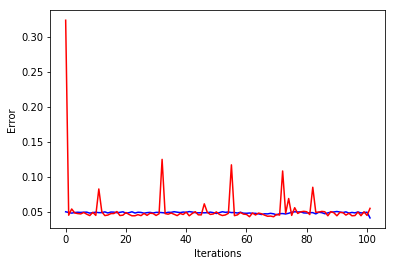

In [0]:
random.seed(0)

trainer = BackpropTrainer(net, dataset=ds_train)
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
line_train = plt.plot(err_train, 'b', err_val, 'r') 
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

Рассчитаем значение доли неправильных ответов на обучающей и контрольной выборке.

In [0]:
res_train = net.activateOnDataset(ds_train).argmax(axis=1) 
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), 
res_test = net.activateOnDataset(ds_test).argmax(axis=1) 
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), 

Error on train:  14.9240393208 Error on test:  10.4166666667


### Задание. Определение оптимального числа нейронов.
В задании требуется исследовать зависимость ошибки на контрольной выборке в зависимости от числа нейронов в скрытом слое сети. Количество нейронов, по которому предполагается провести перебор, записано в векторе 
```
hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
```

1. Для фиксированного разбиения на обучающую и контрольную части подсчитайте долю неправильных ответов (ошибок) классификации на обучении/контроле в зависимости от количества нейронов в скрытом слое сети. Запишите результаты в массивы ```res_train_vec``` и ```res_test_vec```, соответственно. С помощью функции ```plot_classification_error``` постройте график зависимости ошибок на обучении/контроле от количества нейронов. Являются ли графики ошибок возрастающими/убывающими? При каком количестве нейронов достигается минимум ошибок классификации?

2. С помощью функции ```write_answer_nn``` запишите в выходной файл число: количество нейронов в скрытом слое сети, для которого достигается минимум ошибки классификации на контрольной выборке.

In [0]:
random.seed(0) # Зафиксируем seed для получния воспроизводимого результата
np.random.seed(0)

def plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec):
# hidden_neurons_num -- массив размера h, содержащий количество нейронов, по которому предполагается провести перебор,
#   hidden_neurons_num = [50, 100, 200, 500, 700, 1000];
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на обучении;
# res_train_vec -- массив размера h, содержащий значения доли неправильных ответов классификации на контроле
    plt.figure()
    plt.plot(hidden_neurons_num, res_train_vec)
    plt.plot(hidden_neurons_num, res_test_vec, '-r')

hidden_neurons_num = [50, 100, 200, 500, 700, 1000]
res_train_vec = list()
res_test_vec = list()

for nnum in hidden_neurons_num:
    net = buildNetwork(ds_train.indim, nnum, ds_train.outdim, outclass=SoftmaxLayer)
    
    init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
    net._setParameters(init_params)
    
    trainer = BackpropTrainer(net, dataset=ds_train)
    trainer.trainUntilConvergence(maxEpochs=MAX_EPOCHS)
    
    res_train = net.activateOnDataset(ds_train).argmax(axis=1) # Подсчет результата на обучающей выборке
    res_test = net.activateOnDataset(ds_test).argmax(axis=1) # Подсчет результата на тестовой выборке
    
    train_err = percentError(res_train, ds_train['target'].argmax(axis=1))
    test_err = percentError(res_test, ds_test['target'].argmax(axis=1))
    res_train_vec.append(train_err)
    res_test_vec.append(test_err)
    
# Постройте график зависимости ошибок на обучении и контроле в зависимости от количества нейронов
plot_classification_error(hidden_neurons_num, res_train_vec, res_test_vec)     